In [ ]:
%pip install pandas matplotlib seaborn numpy openpyxl

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:


# Leitrura e Vizualização das Tabelas do database
base_rh = pd.read_excel("Base_RH.xlsx", sheet_name=None)
display(base_rh.keys())

In [ ]:
base = base_rh['Base']
base

In [ ]:
# Retirar culnas duplicadas
base = base.drop_duplicates()

# Retirar linhas com valores nulos
base = base.dropna()

# Promover a primeira linha para o cabeçalho
base.columns = base.iloc[0]

# Remover a primeira linha
base = base[1:]

# Resetar o índice
base = base.reset_index(drop=True)

# Convertendo colunas para numérico, ignorando erros para tratar células não numéricas
colunas_numericas = ['Idade', 'Distância_do_trabalho', 'Salário', 'Qte_Empresas_Trabalhadas',
                     'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
                     'Horas_de_treinamento', 'Tempo_de_empresa', 'Anos_no_mesmo_cargo',
                     'Anos_desde_a_ultima_promocao', 'Anos_com_o_mesmo_chefe']
base[colunas_numericas] = base[colunas_numericas].apply(pd.to_numeric, errors='coerce')

# O mesmo para categóricas
colunas_categoricas = ['Funcionário_deixou_a_empresa', 'Frequência de Viagens', 
                       'Formação', 'E-Sat', 'Gênero', 'Estado_Civil', 'Faz_hora_extras?', 
                       'Equilibrio_de_Vida']
base[colunas_categoricas] = base[colunas_categoricas].astype('category')
base.info()

In [ ]:
base

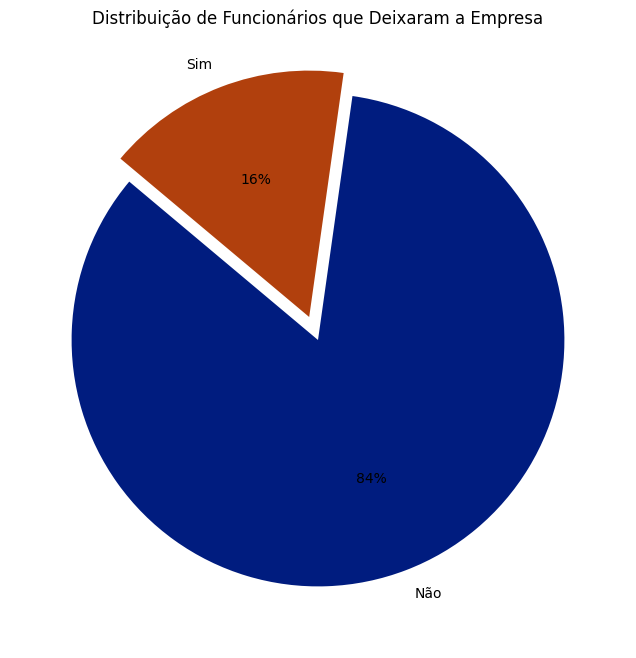

In [36]:
# Vamos analisar a proporção de pessoas que saíram da empresa
churns = base['Funcionário_deixou_a_empresa']
contagem_churns = churns.value_counts()

# Criando a figura
plt.figure(figsize=(8, 8))

# Adicionando título
plt.title('Distribuição de Funcionários que Deixaram a Empresa')

# Criando o parâmetro explode para destacar a fatia 'Sim'
explode = [0.1 if label == 'Sim' else 0 for label in contagem_churns.index]

# Plotando o gráfico de pizza
plt.pie(contagem_churns, 
        labels=contagem_churns.index, 
        colors=palette_color, # type: ignore
        explode=explode,
        autopct='%.0f%%', 
        startangle=140)


# Exibindo o gráfico
plt.show()

In [ ]:
# Propenção critico por idade (regressão linear)

In [ ]:
# Filtrando o DataFrame para funcionários que deixaram a empresa
churns = base[base['Funcionário_deixou_a_empresa'] == 'Sim']

# Contando as ocorrências da variável 'Gênero'
contagem_genero_churn = churns['Gênero'].value_counts()

# Definindo a paleta de cores
palette_color = sns.color_palette('dark')

# Criando a figura
plt.figure(figsize=(8, 8))

# Plotando o gráfico de pizza
plt.pie(contagem_genero_churn, 
        labels=contagem_genero_churn.index, 
        colors=palette_color,
        autopct='%.0f%%', 
        startangle=140)

# Adicionando título
plt.title('Distribuição de Gêneros para Funcionários que Deixaram a Empresa')

# Exibindo o gráfico
plt.show()
